# Probability and Statistics

## Normal distribution

In [1]:
from scipy import stats
stats.norm(0, 1)

In [2]:
# pdf and cdf
stats.norm(0, 1).pdf(0), stats.norm(0, 1).cdf(0) # x=0 일때의 값

(np.float64(0.3989422804014327), np.float64(0.5))

In [3]:
# gaussian distribution
import numpy as np
def norm_(mu, sigma, x):
    d = np.exp(-(x - mu)**2 / (2* sigma**2))
    return d/(2*np.pi*sigma**2)**0.5

norm_(0, 1, x=0)

np.float64(0.3989422804014327)

In [4]:
stats.norm(100, 12).pdf(98), stats.norm(100, 12).cdf(98), stats.norm(100, 12).cdf(100)

(np.float64(0.032786643008494994),
 np.float64(0.43381616738909634),
 np.float64(0.5))


- example: find Pr(X < 8.6) from N(8.0, 5.0)

In [5]:
stats.norm(8, 5).cdf(8.6)

np.float64(0.5477584260205838)

In [6]:
# standardize it
z = (8.6 - 8.0)/5.0
stats.norm(0, 1).cdf(z)

np.float64(0.5477584260205838)

- direct calculation of the pdf

In [7]:
import math
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

print(normpdf(98, 100, 12), stats.norm(100, 12).pdf(98))

0.032786643008494994 0.032786643008494994


## Population and sample
- population, sample
- pouplation mean, population variance
- sample mean, sample variance (biased, unbiased)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
# normal distribution

z = np.random.normal(170, 20, size=1000)    # normal dist with (170, 20)

In [10]:
# uniform distribution

z2 = np.random.uniform(0,100,size=10)
print(z2)

# integers in (1, 99)
z3 = np.arange(1, 100, 10)
z3 = np.random.permutation(z3) # uniform dist (1~ 100)
z3

[77.44055487 54.98903655 70.60656633 70.03052022 47.65122283 70.25963486
  5.3384051   5.74945397 62.76274778 48.15187609]


array([61, 21, 91, 41, 31, 71, 81,  1, 51, 11])

- population mean and variance (모평균과 모분산): usually unknown

In [11]:
z = np.random.normal(170, 20, size=1000)
mu, sigma = np.mean(z), np.std(z)
print(mu, sigma)

169.60024343571277 19.227238105893594


- estimating population mean and variance by sample mean and sample variance (모평균과 모분산의 추정)
- sample variance 를 구할 때  왜 n-1 로 나눌까?

In [12]:
z = np.random.normal(170, 20, size=1000)    # normal (mu=170, sigma=20)

n_sample = 10      # sample size
n_iter=1000        # number of sampling iteration

list_mean, list_sig_biased, list_sig_unbiased = [], [], []

for i in range(n_iter):
    sample = np.random.choice(z, n_sample)
    m = sample.mean()
    sig_biased = ((sample - m)**2).sum() / n_sample
    sig_unbiased = ((sample - m)**2).sum() / (n_sample-1)

    list_mean.append(m)
    list_sig_biased.append(np.sqrt(sig_biased))
    list_sig_unbiased.append(np.sqrt(sig_unbiased))

print(sum(list_mean)/n_iter)
print(sum(list_sig_biased)/n_iter, sum(list_sig_unbiased)/n_iter)

169.95603758232525
19.044052636293213 20.074194070273577


- we can see that unbiased one is closer to the original sigma.

## Estimating population mean and variances by samples
 - normal distribution with:
    - u_x = mu
    - sigma_x = sigma/root(n)

[]

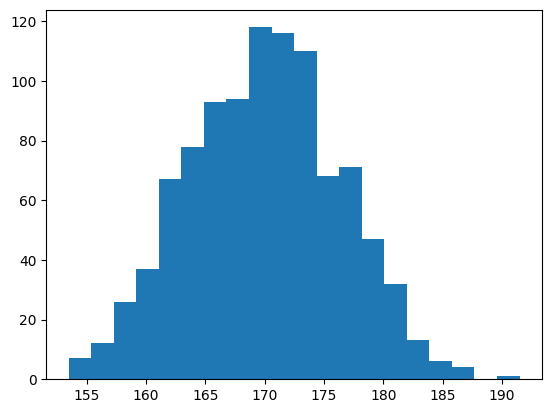

In [13]:
plt.hist(list_mean, bins=20)   # normal
plt.plot()

- estimates population mean and population variance

In [14]:
# estimates population mean and population variance

np.array(list_mean).mean(), np.array(list_mean).std() * np.sqrt(n_sample)

(np.float64(169.95603758232556), np.float64(20.016017332141764))

In [15]:
mu, sigma  # population mean and sigma

(np.float64(169.60024343571277), np.float64(19.227238105893594))

- we see that the sampling distribution of the sample mean can estimate the popuation mean and sigma.

# Central Limit Theorem
- even if the population is not normal, sample means will be approximately normal as long as the sample size is large enough.

0.2916189088244804 0.16459665199721651


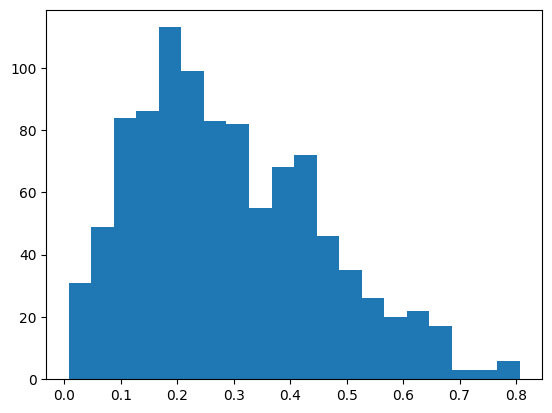

In [16]:
# let's try beta distribution for the population
z = np.random.beta(a=2, b=5, size=1000)
plt.hist(z, bins=20)
print(z.mean(), z.std())  # not normal
plt.show()

In [17]:
# now, sampling distribution is
n_sample = 30     # sample size
n_iter=10000       # number of sampling iteration
sample_means=[]
for i in range(n_iter):
    sample = np.random.choice(z, n_sample)
    sample_means.append(sample.mean())

In [18]:
# mean and std (standard error) of sample means
m_, s_ = np.array(sample_means).mean(), np.array(sample_means).std() * np.sqrt(n_sample)
print(m_, s_)

0.29174861565898047 0.16605948093694228


<Figure size 640x480 with 0 Axes>

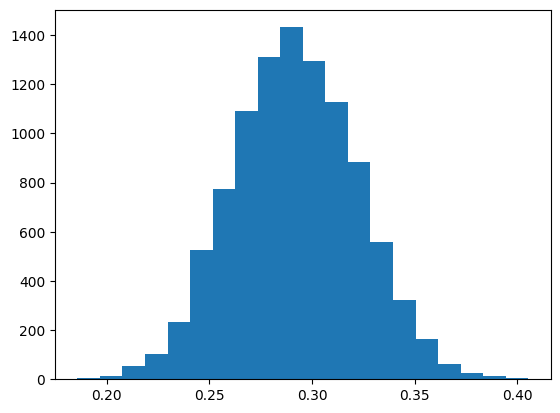

<Figure size 640x480 with 0 Axes>

In [19]:
plt.hist(sample_means, bins=20)
plt.figure()

<Axes: ylabel='Count'>

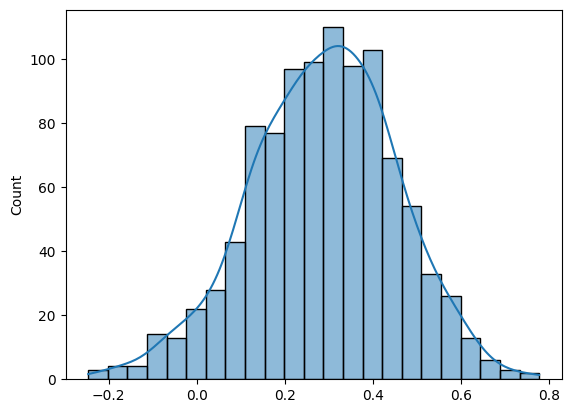

In [20]:
sns.histplot(np.random.normal(m_, s_, size=1000), kde=True)

- looks the similar

# P-value example
- An intuitive dice eperiment

In [21]:
import numpy as np
from scipy import stats

# 가설 설정: 주사위는 공정하다. (6이 나올 확률 p = 1/6)
# 귀무 가설 (H0): p = 1/6
# 대립 가설 (Ha): p != 1/6 (6이 비정상적으로 나온다)

# 실험 설정
num_rolls = 10                  # 총 주사위를 굴린 횟수
p_success_null = 1/6            # 귀무 가설 하에서 6이 나올 확률
observed_successes = 8          # 관찰된 6이 나온 횟수 (극단적인 결과)

# p-값 계산 ('10번 중 8번 이상 6이 나올 확률'을 계산)
# stats.binom.sf(k, n, p)는 k회 초과 성공 확률을 계산하므로,
# k-1을 인자로 넣어 k회 이상 성공 확률을 구한다.
p_value = stats.binom.sf(observed_successes - 1, n=num_rolls, p=p_success_null)

alpha = 0.05   # 유의 수준 설정 (일반적으로 0.05 사용)

print(f"P-값: {p_value:.6f}")
print(f"유의 수준 (alpha): {alpha:.2f}")

# 결과 해석
if p_value < alpha:
    print(f"P-값({p_value:.6f})이 유의 수준({alpha})보다 작으므로 귀무 가설을 기각한다.")
    print(f"결론: 주사위는 공정하지 않다. (6이 나올 확률이 1/6보다 크다고 볼 수 있다.)")
else:
    print(f"P-값({p_value:.6f})이 유의 수준({alpha})보다 크므로 귀무 가설을 기각할 수 없다.")
    print(f"결론: 주사위가 공정하다는 것을 반박할 충분한 증거가 없다.")

P-값: 0.000019
유의 수준 (alpha): 0.05
P-값(0.000019)이 유의 수준(0.05)보다 작으므로 귀무 가설을 기각한다.
결론: 주사위는 공정하지 않다. (6이 나올 확률이 1/6보다 크다고 볼 수 있다.)


# T-distribution and F-distribution
- T-distribution:
  - similar to normal, but with havier tails (meaning that more values are located in the tail ends)
- F-distribution:

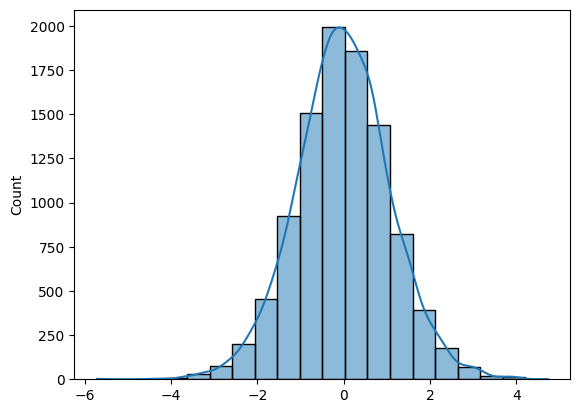

In [22]:
from scipy.stats import t

x = t.rvs(df=12, size=10000) # generate t distribution with sample size 10000
sns.histplot(x, edgecolor='black', bins=20, kde=True)
plt.show()

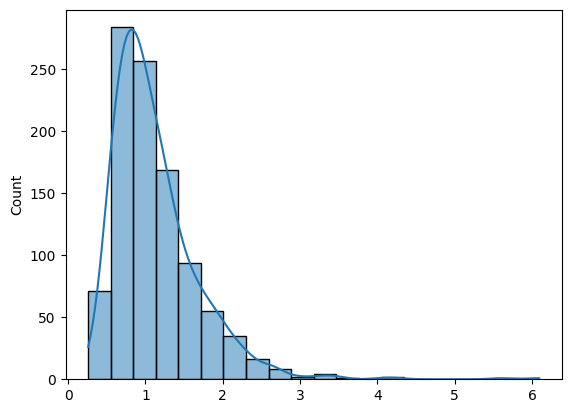

(np.float64(1.125),
 np.float64(0.2805572660098522),
 np.float64(1.8065676503195025),
 np.float64(7.074636015325671))

In [23]:
from scipy.stats import f

dfn, dfd = 29, 18
r = f.rvs(dfn, dfd, size=1000)
sns.histplot(r, edgecolor='black', bins=20, kde=True)
plt.show()

mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
mean, var, skew, kurt

## t-value

<Axes: ylabel='Density'>

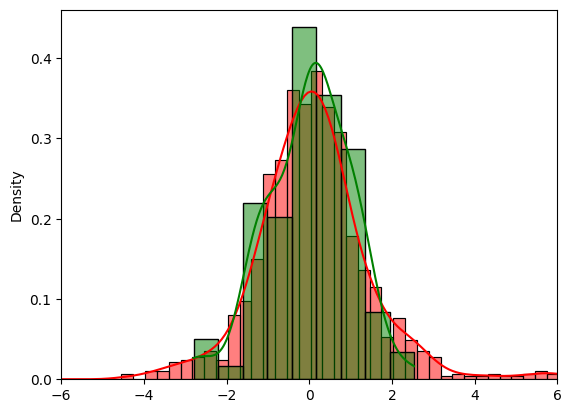

In [24]:
mu, std = 170, 50
z = np.random.normal(mu, std, size=100)
n_sample = 5      # sample size
n_iter=1000       # number of sampling iteration

s_means, s_variances, t_vals = [], [], []
for i in range(n_iter):
    sample = np.random.choice(z, n_sample)

    s_mean = sample.mean()
    s_variance = ((sample - s_mean)**2).sum() / (n_sample-1)
    t_val = (s_mean - mu) / (np.sqrt(s_variance) / np.sqrt(n_sample))

    s_means.append(s_mean)
    s_variances.append(s_variance)
    t_vals.append(t_val)

plt.xlim([-6, 6])
sns.histplot(t_vals, stat='density', kde=True, color='r')                   # t-vals
sns.histplot((z-z.mean())/z.std(), stat='density', kde='True', color='g')   # standard normal (z)

# t-test

In [25]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, t
from scipy import stats
import scipy
import seaborn as sns

- two-sample independent t-test
  - Example : Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy. (벼의 곡물 수확량에 대한 염화암모늄과 요소의 효과를 비교)

In [26]:
Ammonium_chloride=[13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7]
Urea=[12,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16]
n1, n2 = len(Ammonium_chloride), len(Urea)
x1_m, x2_m = np.mean(Ammonium_chloride), np.mean(Urea)
x1_std, x2_std = np.std(Ammonium_chloride), np.std(Urea)
print("number of samples: ", n1, n2)
print("means of two samples: ", x1_m, x2_m)
print("std of two samples: ", x1_std, x2_std)

tval = (x1_m - x2_m) / np.sqrt(x1_std**2/n1 + x2_std**2/n2)   # approx.
pval = scipy.stats.t.cdf(tval, n1+n2-2)
tval, (1-pval)*2

number of samples:  12 12
means of two samples:  14.066666666666665 13.908333333333333
std of two samples:  2.026217055390551 1.9956028050580497


(np.float64(0.19286027404090295), np.float64(0.8488377215788003))

In [27]:
t_value, p_value = ttest_ind(Ammonium_chloride, Urea)  # by functions
t_value, p_value

(np.float64(0.1846496543760765), np.float64(0.8551954147800473))

In [28]:
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value <= alpha:
    print('Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,
          '''We reject the null hypothesis H0. So we conclude that the
          effect of ammonium chloride and urea on grain yield of paddy are not
          equal i.e., μ1 != μ2 at %.2f level of significance.'''%alpha)

Test statistic is 0.184650
p-value for two tailed test is 0.855195


# f-test (one-way ANOVA)
- groups are from one categorical variable
- example:
  - A new medication was developed to increase the libido of those who take the medication.
  - The purpose of this study was to test for a difference between the dosage levels.

In [29]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [30]:
df['dose'].value_counts()

,count
dose,
1,5
2,5
3,5


In [31]:
df.drop('person', axis= 1, inplace= True)
# Recoding value from numeric to string
df['dose'] = df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'})

In [32]:
df

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [33]:
group1 = df['libido'][df['dose'] == 'high']
group2 = df['libido'][df['dose'] == 'low']
group3 = df['libido'][df['dose'] == 'placebo']

In [34]:
import scipy.stats as stats
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(5.118644067796612), pvalue=np.float64(0.024694289538222565))

- --> p-val = 0.02 < 0.05 -> reject H0
- There is a statistically significant difference
between the groups and their effects on the libido.
(실험이나 분석에서 그룹 간에 관찰된 차이가 우연히 발생했을 확률이 2%에 불과하다는 뜻이다. 이 확률이 매우 낮으므로, 그룹 간의 차이는 실제로 의미 있는 것이라고 판단한다.)

# Chi square (Chi2) test

- observed value (input feature) 가 expected value (expected output)와 얼마나 관련이 있는지 결정
- problem of feature selection.

- In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
- X^2 = sum[(Oi - Ei)^2 / Ei], where
  - Oi: observed frq in each category
  - Ei: expected freq
  - k: number of categories
  - sum[(관측값 - 기댓값)^2 / 기댓값]
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value.
- So high Chi-Square value indicates that the hypothesis of independence is incorrect.
- **In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.**

- for the following example (especially for derivation of the expected frequency E), see https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

## stats.chi2_contingency()
- chi2_contingency(): Chi-square test of independence of variables in a contingency table.
  - used when you don't know the underlying distribution but you want to test whether two (or more) groups have the same distribution.

In [35]:
# chi2_contingency returns (chi2, p-value, dof, expected)

cont_tab = [[203, 150, 190, 305],
            [195, 170, 250, 400],
            [200, 235, 271, 280]]
stats.chi2_contingency(cont_tab)

Chi2ContingencyResult(statistic=np.float64(43.1509283858475), pvalue=np.float64(1.0889041270746032e-07), dof=6, expected_freq=array([[177.99368199, 165.19480519, 211.62793963, 293.18357318],
       [213.04668305, 197.72727273, 253.3046683 , 350.92137592],
       [206.95963496, 192.07792208, 246.06739207, 340.8950509 ]]))

In [36]:
# manual calculation
arr = np.array(cont_tab)
c = arr.sum(axis=0)
r = arr.sum(axis=1)
total = r.sum()
e = np.zeros((arr.shape[0], arr.shape[1]))

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        e[i][j] = r[i]*c[j]/total
print (e)   # expected value: same as the result of chi2_contingency()

[[177.99368199 165.19480519 211.62793963 293.18357318]
 [213.04668305 197.72727273 253.3046683  350.92137592]
 [206.95963496 192.07792208 246.06739207 340.8950509 ]]


## one practical example:
- to see whether two features are significantly different

In [37]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]
df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation'])
print(df.shape)

(1189, 2)


In [38]:
df.sample(frac=.1).head()  # 데이터 랜덤하게 일부만

,Age Group,Political Affiliation
1048,65 & older,Conservative
69,18-29,Conservative
691,45-65,Conservative
284,30-44,Conservative
441,30-44,Socialist


- contingency table: display format used to analyse and record the relationship between two or more categorical variables.

In [39]:
# create contingency table
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'],
                            margins=True, margins_name="Total")
data_crosstab

Political Affiliation,Conservative,Other,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-65,220,4,216,440
65 & older,86,4,101,191
Total,626,19,544,1189


### manual calculation

In [40]:
# significance level
alpha = 0.05
dof = 6   # (3-1) * (4-1)

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = df['Age Group'].unique()
columns = df['Political Affiliation'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

pvalue = 1 - stats.chi2.cdf(chi_square, dof)
print("Chi2-score is: {}, and p-value is: {}".format(chi_square, pvalue))

Chi2-score is: 24.367421717305202, and p-value is: 0.0004469083391495099


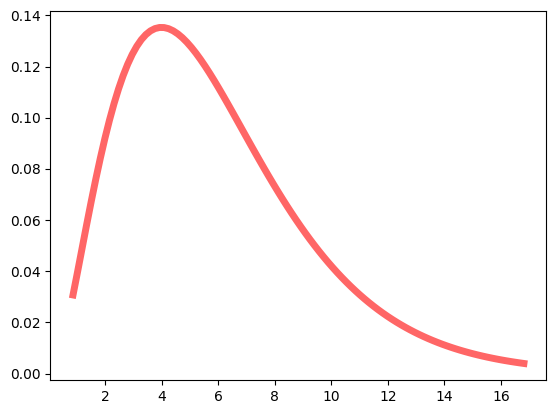

In [41]:
dof = 6   # (3-1) * (4-1)
x = np.linspace(stats.chi2.ppf(0.01, dof),
                stats.chi2.ppf(0.99, dof), 100)
plt.plot(x, stats.chi2.pdf(x, dof),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

In [42]:
stats.chi2(df=6).ppf(.95)

np.float64(12.591587243743977)

- chi_square = 24.36 >> 12.59 -> so, reject H0
  - two features are significantly different.

### using the functions

In [43]:
# let's use the function chi2_contingency() - the same result
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'])
data_crosstab

Political Affiliation,Conservative,Other,Socialist
Age Group,,,
18-29,141,4,68
30-44,179,7,159
45-65,220,4,216
65 & older,86,4,101


In [44]:
tab = data_crosstab.values
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=np.float64(24.367421717305206), pvalue=np.float64(0.00044690833914947634), dof=6, expected_freq=array([[112.14297729,   3.40370059,  97.45332212],
       [181.64003364,   5.51303616, 157.84693019],
       [231.6568545 ,   7.03111859, 201.31202691],
       [100.56013457,   3.05214466,  87.38772077]]))

- statistic = np.float64(24.367421717305206)
  - 의미: 관측된 빈도와 기대되는 빈도(두 변수가 독립적일 때 예상되는 빈도) 사이의 차이를 측정하는 값이다. 이 값이 클수록 두 변수 간의 관계가 강하다는 것을 시사한다.
- pvalue = np.float64(0.00044690833914947634)
  - p-val < 0.05 --> 이는 우연히 이런 결과가 나올 확률이 매우 낮다는 것을 의미한다. 따라서 귀무가설을 기각하고, 두 변수 사이에 통계적으로 유의미한 관계가 있다고 결론 내린다.

# Exercise

pd.crosstab()

In [45]:
# for exercise
import pandas as pd
data = pd.DataFrame({'id': ['id1', 'id1', 'id1', 'id2', 'id2', 'id3'],
                  'fac_1': ['a', 'a', 'a', 'b', 'b', 'b'],
                  'fac_2': ['d', 'd', 'd', 'c', 'c', 'd']})
data

,id,fac_1,fac_2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [46]:
pd.crosstab(data.fac_1, data.fac_2)

fac_2,c,d
fac_1,,
a,0,3
b,2,1


In [47]:
pd.crosstab(data.id, data.fac_1)

fac_1,a,b
id,,
id1,3,0
id2,0,2
id3,0,1


----------